<a href="https://colab.research.google.com/github/Cider-Vin10/Deep-Learning/blob/main/Neurons/MP_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import operator



In [3]:
class MPModel:
    def __init__(self, function='sum'):
        # We can pass some initial value of threshold.
        self.threshold = None
        if function == 'sum':
            self.function = self.sum_function

    def sum_function(self, x):
        return sum(x) >= self.threshold

    def and_function(self, x):
        return all(x)

    def or_function(self, x):
        return any(x)

    def fit(self, X_DataFrame, y_DataFrame):
        threshold_accuracy_dict = {}
        for threshold in range(len(X_DataFrame.columns) + 1):
            threshold_accuracy_dict[threshold] = None
        for threshold in threshold_accuracy_dict.keys():
            self.threshold = threshold
            predictions = self.predict(X_DataFrame)
            threshold_accuracy_dict[threshold] = accuracy_score(y_DataFrame, predictions)
        self.threshold = max(threshold_accuracy_dict.items(), key=operator.itemgetter(1))[0]
        print(self.threshold, 'threshold', threshold_accuracy_dict)

    def predict(self, X_DataFrame):
        results = np.array([])
        for i in range(len(X_DataFrame)):
            result = self.function(X_DataFrame.iloc[i])
            results = np.append(results, result)
        return results



In [8]:
df_dict = {
    'Viney': [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
    'Nishant': [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
    'Vedant': [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
}
pd_df = pd.DataFrame(df_dict)


mpm = MPModel()
mpm.fit(pd_df[['Viney', 'Nishant']], pd_df['Vedant'])

df_dict_test = {
    'Viney': [0, 1, 1, 0],
    'Nishant': [1, 1, 0, 0],
    'Vedant': [1, 1, 1, 0]
}

pd_df_test = pd.DataFrame(df_dict_test)
predictions = mpm.predict(pd_df_test[['Viney', 'Nishant']])
accuracy_score(predictions, pd_df_test['Vedant'])



1 threshold {0: 0.625, 1: 0.875, 2: 0.5625}


1.0

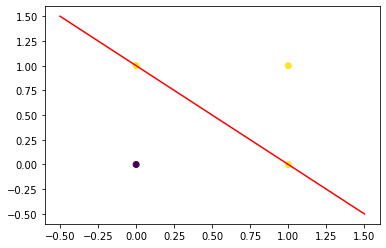

In [7]:
x = np.linspace(-0.5, 1.5, 100)
y = -x + 1
plt.plot(x, y, '-r', label='y=2x+1')
plt.plot()
plt.scatter(df_dict_test['Viney'], df_dict_test['Nishant'], c=df_dict_test['Vedant'])